In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv("training_data_with_coordinates_final.csv")

In [41]:
df.head(10)

,file_name,transcript,field,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript_length,...,y_top_left y_bottom_right,y_top_left transcript_length,x_bottom_right^2,x_bottom_right y_bottom_right,x_bottom_right transcript_length,y_bottom_right^2,y_bottom_right transcript_length,transcript_length^2,field_encoded,file_encoder
0,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,a,OTHER,33.0,33.0,215.0,4.0,227.0,21.0,1.0,...,84.0,4.0,51529.0,4767.0,227.0,441.0,21.0,1.0,0,0
1,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,Employee's,OTHER,35.0,44.0,235.0,3.0,308.0,21.0,10.0,...,63.0,30.0,94864.0,6468.0,3080.0,441.0,210.0,100.0,0,0
2,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,social,OTHER,46.0,51.0,311.0,3.0,349.0,20.0,6.0,...,60.0,18.0,121801.0,6980.0,2094.0,400.0,120.0,36.0,0,0
3,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,security,OTHER,53.0,60.0,352.0,3.0,401.0,20.0,8.0,...,60.0,24.0,160801.0,8020.0,3208.0,400.0,160.0,64.0,0,0
4,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,number,OTHER,62.0,67.0,404.0,3.0,457.0,21.0,6.0,...,63.0,18.0,208849.0,9597.0,2742.0,441.0,126.0,36.0,0,0
5,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,"Safe,",OTHER,106.0,110.0,783.0,1.0,819.0,20.0,5.0,...,20.0,5.0,670761.0,16380.0,4095.0,400.0,100.0,25.0,0,0
6,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,"Accurate,",OTHER,112.0,120.0,822.0,3.0,897.0,23.0,9.0,...,69.0,27.0,804609.0,20631.0,8073.0,529.0,207.0,81.0,0,0
7,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,Visit,OTHER,140.0,144.0,1046.0,2.0,1079.0,19.0,5.0,...,38.0,10.0,1164241.0,20501.0,5395.0,361.0,95.0,25.0,0,0
8,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,the,OTHER,146.0,148.0,1081.0,4.0,1103.0,20.0,3.0,...,80.0,12.0,1216609.0,22060.0,3309.0,400.0,60.0,9.0,0,0
9,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,IRS,OTHER,150.0,152.0,1106.0,4.0,1133.0,20.0,3.0,...,80.0,12.0,1283689.0,22660.0,3399.0,400.0,60.0,9.0,0,0


In [24]:
df.isna().sum()

Unnamed: 0         0
start_index        0
end_index          0
x_top_left         0
y_top_left         0
x_bottom_right     0
y_bottom_right     0
transcript        58
field              0
file_name          0
dtype: int64

In [25]:
df[df['transcript'].isna() == True]

,Unnamed: 0,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field,file_name
11225,11225,4133,4135,1680,961,1713,988,NaN,OTHER,0e997ed9-76ba-4124-ac89-38e870352902_document-...
17836,17836,2237,2239,111,280,132,302,NaN,OTHER,1606c134-52e6-47cc-bd76-64b0ecaa4157_document-...
19974,19974,6467,6468,1623,689,1653,711,NaN,OTHER,180a608b-321d-418b-9643-5ca2bc934dcb_document-...
19978,19978,6638,6639,1288,722,1318,748,NaN,OTHER,180a608b-321d-418b-9643-5ca2bc934dcb_document-...
21900,21900,5021,5022,1592,673,1622,696,NaN,OTHER,180a608b-321d-418b-9643-5ca2bc934dcb_document-...
30726,30726,4309,4310,1990,962,2026,987,NaN,OTHER,2e2254f8-7714-4ffe-bacb-0c63420c2265_document-...
32573,32573,4365,4366,1678,963,1714,992,NaN,OTHER,2e2254f8-7714-4ffe-bacb-0c63420c2265_document-...
38251,38251,4832,4833,1315,652,1344,674,NaN,OTHER,313f76e5-31db-47ad-87cd-4fb3126702af_document-...
39748,39748,4297,4298,1678,963,1714,992,NaN,OTHER,3546f5d8-2b0a-4ccf-89dc-4b074d0fcc74_document-...
39752,39752,4587,4589,1990,959,2026,987,NaN,OTHER,3546f5d8-2b0a-4ccf-89dc-4b074d0fcc74_document-...


In [26]:
df['transcript'] = df['transcript'].fillna("NULL")

In [ ]:
# Let's make new column that store the length of `transcript` values

In [27]:
df['transcript_length'] = df['transcript'].apply(len)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237616 entries, 0 to 237615
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         237616 non-null  int64 
 1   start_index        237616 non-null  int64 
 2   end_index          237616 non-null  int64 
 3   x_top_left         237616 non-null  int64 
 4   y_top_left         237616 non-null  int64 
 5   x_bottom_right     237616 non-null  int64 
 6   y_bottom_right     237616 non-null  int64 
 7   transcript         237616 non-null  object
 8   field              237616 non-null  object
 9   file_name          237616 non-null  object
 10  transcript_length  237616 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 19.9+ MB


In [29]:
df = df[['start_index', 'end_index', 'x_top_left', 'y_top_left', 'x_bottom_right', 'y_bottom_right', 'transcript_length' ,'file_name' , 'transcript' , 'field']]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237616 entries, 0 to 237615
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   start_index        237616 non-null  int64 
 1   end_index          237616 non-null  int64 
 2   x_top_left         237616 non-null  int64 
 3   y_top_left         237616 non-null  int64 
 4   x_bottom_right     237616 non-null  int64 
 5   y_bottom_right     237616 non-null  int64 
 6   transcript_length  237616 non-null  int64 
 7   file_name          237616 non-null  object
 8   transcript         237616 non-null  object
 9   field              237616 non-null  object
dtypes: int64(7), object(3)
memory usage: 18.1+ MB


In [31]:
df['field'].value_counts()

field
OTHER                                 222548
employerAddressStreet_name              2260
employerName                            1954
employeeName                            1123
box2FederalIncomeTaxWithheld            1106
box1WagesTipsAndOtherCompensations      1043
box16StateWagesTips                     1043
box17StateIncomeTax                     1023
box4SocialSecurityTaxWithheld           1009
box3SocialSecurityWages                  979
employerAddressCity                      840
employerAddressZip                       572
employerAddressState                     552
taxYear                                  546
einEmployerIdentificationNumber          542
ssnOfEmployee                            476
Name: count, dtype: int64

In [32]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


numeric_features = df.drop(columns=['file_name', 'transcript', 'field'])


poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the numeric features
numeric_poly = poly.fit_transform(numeric_features)

# Convert the transformed features into a DataFrame
numeric_poly_df = pd.DataFrame(numeric_poly, columns=poly.get_feature_names_out(numeric_features.columns))

df_poly = pd.concat([df[['file_name', 'transcript', 'field']], numeric_poly_df], axis=1)

In [33]:
df_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237616 entries, 0 to 237615
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   file_name                         237616 non-null  object 
 1   transcript                        237616 non-null  object 
 2   field                             237616 non-null  object 
 3   start_index                       237616 non-null  float64
 4   end_index                         237616 non-null  float64
 5   x_top_left                        237616 non-null  float64
 6   y_top_left                        237616 non-null  float64
 7   x_bottom_right                    237616 non-null  float64
 8   y_bottom_right                    237616 non-null  float64
 9   transcript_length                 237616 non-null  float64
 10  start_index^2                     237616 non-null  float64
 11  start_index end_index             237616 non-null  f

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import time
import numpy as np

# Assuming df_poly is your DataFrame with polynomial features
data = df_poly.copy()

target = 'field'
features = ['start_index', 'end_index', 'x_top_left', 'y_top_left', 
            'x_bottom_right', 'y_bottom_right', 'transcript_length' ,'start_index^2', 'start_index end_index',
       'start_index x_top_left', 'start_index y_top_left',
       'start_index x_bottom_right', 'start_index y_bottom_right',
       'start_index transcript_length', 'end_index^2', 'end_index x_top_left',
       'end_index y_top_left', 'end_index x_bottom_right',
       'end_index y_bottom_right', 'end_index transcript_length',
       'x_top_left^2', 'x_top_left y_top_left', 'x_top_left x_bottom_right',
       'x_top_left y_bottom_right', 'x_top_left transcript_length',
       'y_top_left^2', 'y_top_left x_bottom_right',
       'y_top_left y_bottom_right', 'y_top_left transcript_length',
       'x_bottom_right^2', 'x_bottom_right y_bottom_right',
       'x_bottom_right transcript_length', 'y_bottom_right^2',
       'y_bottom_right transcript_length', 'transcript_length^2']

# Split the data into features and target
X = data[features]
y = data[target]

# Encode the target variable if it's categorical
y_encoded = pd.factorize(y)[0]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Number of features to select
n_features_to_select = 5

# Start timing
start_time = time.time()

# Initialize support and ranking
support_ = np.ones(X_train.shape[1], dtype=bool)
ranking_ = np.ones(X_train.shape[1], dtype=int)

# Fit RFE with a progress bar
n_iterations = X_train.shape[1] - n_features_to_select
with tqdm(total=n_iterations, desc="RFE Progress", unit="step") as pbar:
    for _ in range(n_iterations):
        rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
        rfe.fit(X_train.iloc[:, support_], y_train)  # Use .iloc for DataFrame indexing
        
        # Update support and ranking
        support_[support_] = rfe.support_
        ranking_[~support_] += 1
        
        # Update progress bar
        pbar.update(1)
        if np.sum(support_) <= n_features_to_select:
            break

# Stop timing
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Get the selected features
selected_features = X.columns[support_]

print("Selected Features:")
print(selected_features)

print("Feature Ranking:")
print(ranking_)

print(f"Time taken for training: {time_taken:.2f} seconds")


Encoding 'field' column...


Encoding Progress: 100%|█████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 3192.16it/s]


Encoding 'file_name' column...


Encoding Progress: 100%|███████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 7800.57it/s]


Training XGBoost model...
Calculating SHAP values...
Generating SHAP summary plot...


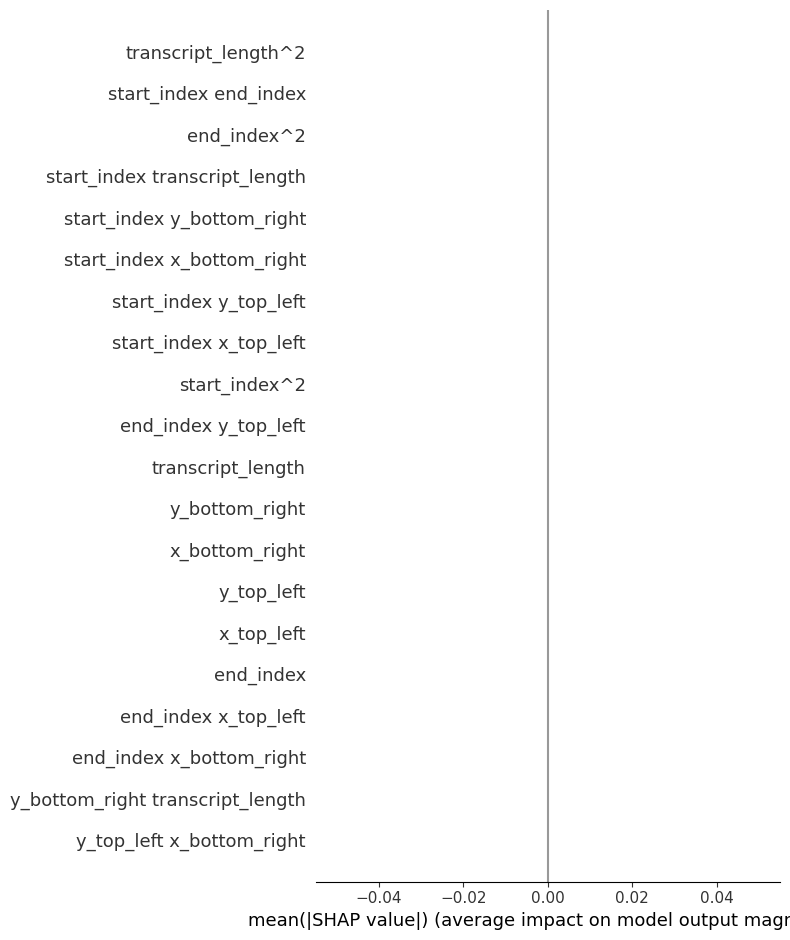

In [35]:
import pandas as pd
import xgboost as xgb
import shap
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np

df = df_poly.copy()

field_encoder = LabelEncoder()
file_encoder = LabelEncoder()

print("Encoding 'field' column...")
unique_values1 = df['field'].unique()
encoded_values1 = {}
for val in tqdm(unique_values1, desc="Encoding Progress"):
    encoded_values1[val] = field_encoder.fit_transform([val])[0]


df['field_encoded'] = df['field'].map(encoded_values1)



print("Encoding 'file_name' column...")
unique_values2 = df['file_name'].unique()
encoded_values2 = {}
for val in tqdm(unique_values2, desc="Encoding Progress"):
    encoded_values2[val] = file_encoder.fit_transform([val])[0]

# Apply encoding
df['file_encoder'] = df['file_name'].map(encoded_values2)


# Prepare the feature set and target variable
X = df[['start_index', 'end_index', 'x_top_left', 'y_top_left', 
        'x_bottom_right', 'y_bottom_right', 'transcript_length' ,'start_index^2', 'start_index end_index',
       'start_index x_top_left', 'start_index y_top_left',
       'start_index x_bottom_right', 'start_index y_bottom_right',
       'start_index transcript_length', 'end_index^2', 'end_index x_top_left',
       'end_index y_top_left', 'end_index x_bottom_right',
       'end_index y_bottom_right', 'end_index transcript_length',
       'x_top_left^2', 'x_top_left y_top_left', 'x_top_left x_bottom_right',
       'x_top_left y_bottom_right', 'x_top_left transcript_length',
       'y_top_left^2', 'y_top_left x_bottom_right',
       'y_top_left y_bottom_right', 'y_top_left transcript_length',
       'x_bottom_right^2', 'x_bottom_right y_bottom_right',
       'x_bottom_right transcript_length', 'y_bottom_right^2',
       'y_bottom_right transcript_length', 'transcript_length^2']]
y = df['field_encoded']

# Train an XGBoost model
print("Training XGBoost model...")
model = xgb.XGBClassifier(eval_metric='mlogloss')

# Fit the model
model.fit(X, y)

# Calculate SHAP values
print("Calculating SHAP values...")
explainer = shap.TreeExplainer(model)

# Get SHAP values for the first class (or mean absolute SHAP values if it's multi-class)
shap_values = explainer.shap_values(X)

# If the model is a multi-class classifier, use mean absolute values across all classes
if isinstance(shap_values, list):
    shap_values = np.mean(np.abs(shap_values), axis=0)

# Visualize feature importance
print("Generating SHAP summary plot...")
shap.summary_plot(shap_values, X, plot_type="bar")


In [36]:
import string
df_poly['symbol_count'] = df_poly['transcript'].apply(lambda x: sum(1 for char in x if char in string.punctuation))

In [37]:
df_poly['transcript'].sample(8)

222038    SUMMARY
225605        272
72666         and
168485          ;
51734         and
103183        FED
116286       tips
12152       other
Name: transcript, dtype: object

In [38]:
df_poly.head()

,file_name,transcript,field,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript_length,...,y_top_left x_bottom_right,y_top_left y_bottom_right,y_top_left transcript_length,x_bottom_right^2,x_bottom_right y_bottom_right,x_bottom_right transcript_length,y_bottom_right^2,y_bottom_right transcript_length,transcript_length^2,symbol_count
0,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,a,OTHER,33.0,33.0,215.0,4.0,227.0,21.0,1.0,...,908.0,84.0,4.0,51529.0,4767.0,227.0,441.0,21.0,1.0,0
1,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,Employee's,OTHER,35.0,44.0,235.0,3.0,308.0,21.0,10.0,...,924.0,63.0,30.0,94864.0,6468.0,3080.0,441.0,210.0,100.0,1
2,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,social,OTHER,46.0,51.0,311.0,3.0,349.0,20.0,6.0,...,1047.0,60.0,18.0,121801.0,6980.0,2094.0,400.0,120.0,36.0,0
3,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,security,OTHER,53.0,60.0,352.0,3.0,401.0,20.0,8.0,...,1203.0,60.0,24.0,160801.0,8020.0,3208.0,400.0,160.0,64.0,0
4,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,number,OTHER,62.0,67.0,404.0,3.0,457.0,21.0,6.0,...,1371.0,63.0,18.0,208849.0,9597.0,2742.0,441.0,126.0,36.0,0


In [39]:
df_poly.shape

(237616, 39)

In [40]:
df_poly.to_csv("training_data_ploy_features.csv")